# Challenge - Eduardo Rossel

1. Download the file `flux.csv` from github (compressed as `flux.csv.zip`).
2. Perform an EDA over `flux.csv` file.

### EDA

In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

The database contains the following variables between others:

- station_code: station code
- station_name: name of the watershed
- date: date of measurement
- flux: water flux for that day
- avg_precip: average precipitation for that day in that watershed
- avg_max_temp: maximum average temperature for that day in that watershed

In [2]:
flux_ori = pd.read_csv('flux.csv/flux.csv')

In [3]:
flux = flux_ori.copy()
flux.head()

,date,basin_id,flux,precip,temp_max,gauge_name,lat,lon,mean_elev,area_km2
0,1980-01-01,1001001,0.579,0.0,10.685653,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859
1,1980-01-02,1001001,0.543,0.0,11.470960,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859
2,1980-01-03,1001001,0.482,0.0,11.947457,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859
3,1980-01-04,1001001,0.459,0.0,12.424489,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859
4,1980-01-05,1001001,0.436,0.0,12.649203,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859


In [4]:
flux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180480 entries, 0 to 4180479
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   date        object 
 1   basin_id    int64  
 2   flux        float64
 3   precip      float64
 4   temp_max    float64
 5   gauge_name  object 
 6   lat         float64
 7   lon         float64
 8   mean_elev   float64
 9   area_km2    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 318.9+ MB


#### Missing Values

There's a small percetage of missing values on _precip_ and _temp_max_ variables. NA values appear on a number of different stations but mostly appear during May - June 2020. As the data appears to be missing only on the last couple of months of data and it's less than 1% of our total data. We are not going to spend time imputing these values, and just going to drop them for the time being. 

In [5]:
# Missing values
round(flux.isna().sum()*100/flux.basin_id.count(),2)

date          0.00
basin_id      0.00
flux          0.00
precip        0.13
temp_max      0.13
gauge_name    0.00
lat           0.00
lon           0.00
mean_elev     0.00
area_km2      0.00
dtype: float64

In [6]:
flux.isna().sum()

date             0
basin_id         0
flux             0
precip        5443
temp_max      5443
gauge_name       0
lat              0
lon              0
mean_elev        0
area_km2         0
dtype: int64

In [7]:
# Stations with missing values
flux[flux.precip.isna()].gauge_name.value_counts()

Estero Yerba Loca Antes Junta San Francisco         37
Rio Itata En Paso Hondo                             37
Rio Maipo En Cabimbao                               37
Rio Biobio En Desembocadura                         34
Rio Colorado Antes Junta Rio Olivares               32
                                                    ..
Rio Huequecura Aguas Arriba De Embalse Angostura    22
Rio Tolten En Coipue                                15
Rio Maule En Longitudinal                           15
Rio Chamiza Ante Junta Rio Chico                    10
Rio Loa Antes Represa Lequena                        2
Name: gauge_name, Length: 174, dtype: int64

In [8]:
# Dates with missing values
flux[flux.precip.isna()].date.value_counts()

2020-05-17    173
2020-05-10    173
2020-05-15    173
2020-05-14    173
2020-05-13    173
2020-05-11    172
2020-05-12    172
2020-05-09    172
2020-05-19    172
2020-05-07    172
2020-05-08    172
2020-05-16    172
2020-05-18    172
2020-05-20    171
2020-05-06    171
2020-05-24    170
2020-05-25    170
2020-05-23    169
2020-05-22    169
2020-05-26    169
2020-05-27    169
2020-05-21    168
2020-05-29    168
2020-05-28    167
2020-05-30    166
2020-06-01    166
2020-06-03    165
2020-06-06    165
2020-05-31    165
2020-06-05    165
2020-06-02    165
2020-06-04    164
2020-05-02      4
2020-05-01      4
2020-05-05      4
2020-05-03      4
2020-05-04      4
Name: date, dtype: int64

In [9]:
flux.dropna(inplace = True)
# Missing values
round(flux.isna().sum()*100/flux.basin_id.count(),2)

date          0.0
basin_id      0.0
flux          0.0
precip        0.0
temp_max      0.0
gauge_name    0.0
lat           0.0
lon           0.0
mean_elev     0.0
area_km2      0.0
dtype: float64

In [10]:
flux.describe()

,basin_id,flux,precip,temp_max,lat,lon,mean_elev,area_km2
count,4.175037e+06,4.175037e+06,4.175037e+06,4.175037e+06,4.175037e+06,4.175037e+06,4.175037e+06,4.175037e+06
mean,7.179221e+06,5.249398e+01,2.947445e+00,1.365728e+01,-3.569397e+01,-7.129583e+01,1.760149e+03,2.403915e+03
std,3.181164e+06,1.674156e+02,8.766749e+00,6.615037e+00,8.047914e+00,1.254446e+00,1.382302e+03,4.321229e+03
min,1.001001e+06,0.000000e+00,0.000000e+00,-1.160359e+01,-5.494690e+01,-7.366670e+01,1.181229e+02,1.789123e+01
25%,4.558001e+06,8.690000e-01,0.000000e+00,9.162867e+00,-3.915000e+01,-7.231670e+01,5.847012e+02,3.761001e+02
50%,7.350003e+06,5.180000e+00,0.000000e+00,1.321396e+01,-3.588420e+01,-7.137190e+01,1.195311e+03,8.205541e+02
75%,9.416001e+06,2.990000e+01,6.422626e-01,1.805745e+01,-3.126560e+01,-7.050670e+01,3.048161e+03,2.461610e+03
max,1.293000e+07,1.580500e+04,2.132120e+02,4.081117e+01,-1.784280e+01,-6.763920e+01,4.910152e+03,5.224367e+04


#### Plotting data

Through looking at the correlation and scatterplot of our numerical variables, the following can be observed:
* Flux has low positive correlation to precipitations. This is to be expected as the as rains produce increases in the flux.
* Temp has a low negative correlation to precipitations and flux. This is also to be expected as in Chile precipitations ocurred at lower temperatures.

In [11]:
num_values = ['flux','precip','temp_max','mean_elev']

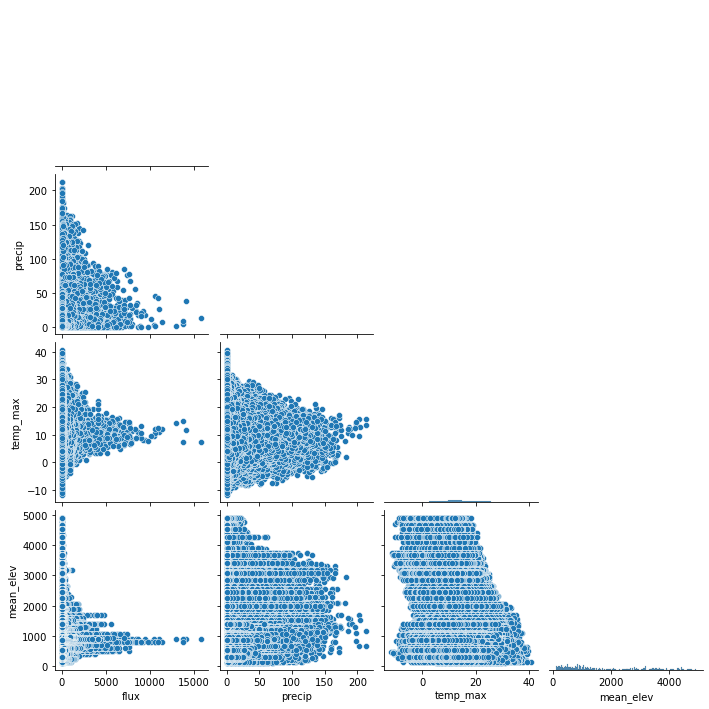

In [12]:
# Scatter x-y
sns.pairplot(data=flux[num_values], corner=True)


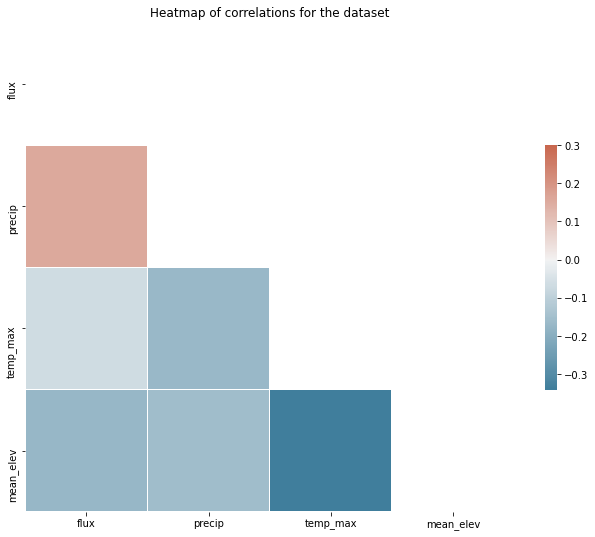

In [37]:
# Correlations
corr = flux[num_values].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
g = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
g.set(title='Heatmap of correlations for the dataset');

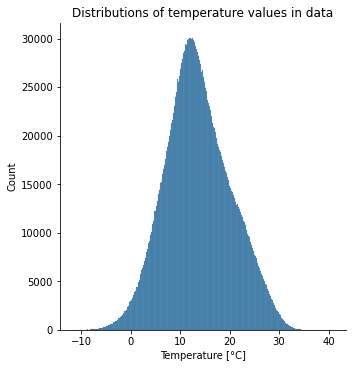

In [40]:
_ = sns.displot(flux.temp_max)
_.set(title = 'Distributions of temperature values in data', 
      xlabel='Temperature [°C]',
      ylabel='Count');

/Users/eduardorossel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


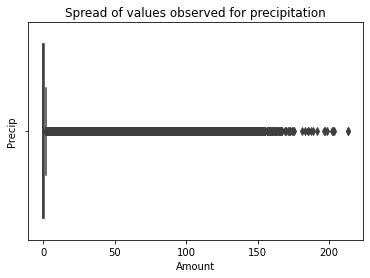

In [42]:
_ = sns.boxplot(flux.precip)
_.set(title = 'Spread of values observed for precipitation', 
      xlabel='Amount',
      ylabel='Precip');

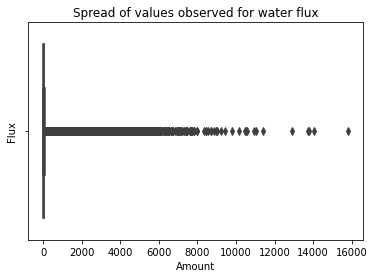

In [59]:
_ = sns.boxplot(flux.flux)
_.set(title = 'Spread of values observed for water flux', 
      xlabel='Amount',
      ylabel='Flux');

In [17]:
#Working with dates
flux.date = flux.date.apply(lambda d: pd.to_datetime(d, errors='coerce'))

In [18]:
print(flux.date.min())
print(flux.date.max())

1980-01-01 00:00:00
2020-04-30 00:00:00


In [19]:
flux = flux.set_index('date', drop=True)

### Plotting flux, temperature and precipitations

3. Plot flux, temperature and precipitations:
    - a) Write a function that plot a time series of a specific variable (flux, temp, precip) from a station. Should look like this:
        ```python
        def plot_one_timeserie(cod_station, variable, min_date, max_date):
        ```
        
    - b) Now write a function that plots the 3 variables at the same time. As the variables are in different scales, you can normalize before plotting them. Should look like this:
        ```python
        def plot_three_timeseries(cod_station, min_date, max_date):
        ```   

No such variable exists: "tempura". Please consider one of the following [temp, flux, precip]


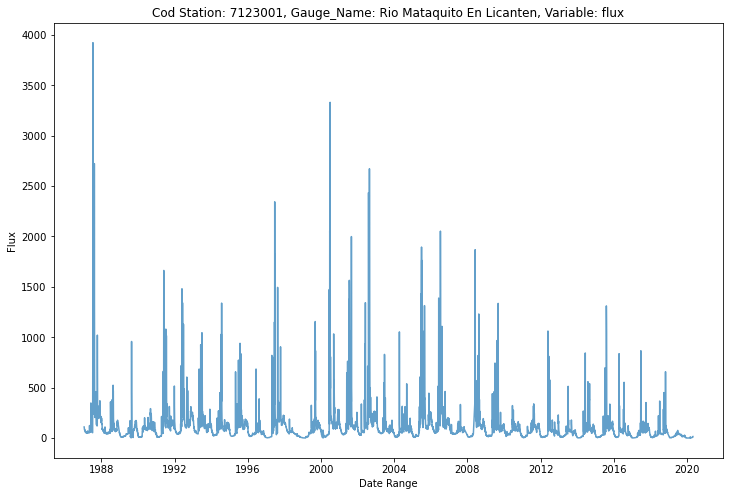

In [20]:
def plot_one_timeserie(cod_station, variable, min_date, max_date):
        if variable.lower() not in ['flux', 'temp','precip']:
            print('No such variable exists: "{}". Please consider one of the following [temp, flux, precip]'.format(variable))
        else: 
            if variable.lower() == 'temp':
                variable = 'temp_max'
            # Plot the data    
            fig, ax  = plt.subplots(figsize=(12,8))
            ax.plot(flux[flux.basin_id == cod_station].loc[min_date:max_date][variable], alpha = 0.7)
            ax.set_title('Cod Station: {}, Gauge_Name: {}, Variable: {}'.format(cod_station, 
                                                                                flux[flux.basin_id == cod_station].gauge_name[0],
                                                                                variable))
            ax.set_ylabel('{}'.format(variable.capitalize()))
            ax.set_xlabel('Date Range')
            plt.show()
            
# Test
plot_one_timeserie(1001001, 'tempura', '1980-01-01','2020-06-06')
plot_one_timeserie(7123001, 'flux', '1980-01-01','2020-06-06')   

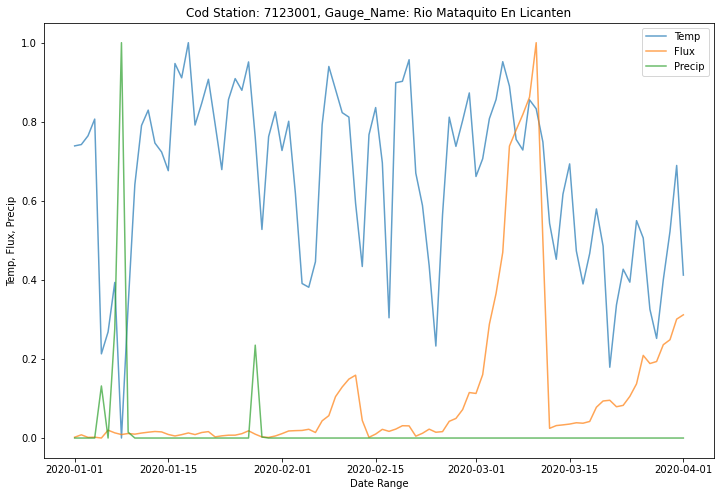

In [21]:
def plot_three_timeseries(cod_station, min_date, max_date):
    df = flux[flux.basin_id == cod_station].loc[min_date:max_date][['temp_max','flux','precip']]
    df_norm = df.copy()
    # apply normalization
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())    
    
    # plot normalized data
    fig, ax  = plt.subplots(figsize=(12,8))
    ax.plot(df_norm.temp_max, alpha = 0.7, label='Temp')
    ax.plot(df_norm.flux, alpha = 0.7, label='Flux')
    ax.plot(df_norm.precip, alpha = 0.7, label='Precip')
    ax.set_title('Cod Station: {}, Gauge_Name: {}'.format(cod_station, flux[flux.basin_id == cod_station].gauge_name[0]))
    ax.set_ylabel('Temp, Flux, Precip')
    ax.set_xlabel('Date Range')
    ax.legend()
    plt.show()

plot_three_timeseries(7123001,'2020-01-01','2020-04-01')  

### Identifying extreme flux, temperature and precipitations

4. Create three variables called:
    - `flux_extreme`
    - `temp_extreme`
    - `precip_extreme`
    
    This variables should take the value of 1 when that variable in a specific day was extreme. Being extreme could be considered as being greater than expected. For example, a flux can be considered as extreme (value 1) when is over the 95 percentile of the flux distribution for that specific season, and takes the value 0 otherwise. Taking into account the seasonality of that variables is very important, because $25^\circ C$ could be considered as extreme in wintertime, but it’d be a normal temperature for summertime.


**Do you consider this a good way of capturing extreme events? Or you would have used a different method? Which one?**

It's a starting point. I believe it's important to consider where are the stations located, as Chile is an extense country and the flux, temperature and precipitations are heavily influenced by the geography and local weather of the different areas. Following the same example used above, a temperature of $25^\circ C$ could be considered an extreme in wintertime for cities in the center and south of Chile, but it's actually just a couple of degrees above average temperature in northern cities such as Arica.


In [22]:
def season_from_date(date):
    year = str(date.year)
    seasons = {'autumn': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'winter': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'spring': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['winter']:
        return 'winter'
    if date in seasons['autumn']:
        return 'autumn'
    else:
        return 'summer'


In [23]:
start_time = time.time()
flux['season'] = [season_from_date(date) for date in flux.index]
print("--- %s seconds ---" % (time.time() - start_time))

--- 836.943984746933 seconds ---


In [24]:
flux.sample(20)

,basin_id,flux,precip,temp_max,gauge_name,lat,lon,mean_elev,area_km2,season
date,,,,,,,,,,
1989-07-15,5722001,0.597,0.000000,14.206255,Estero Arrayan En La Montosa,-33.3256,-70.4561,2513.131940,216.470194,winter
2014-12-03,9414001,84.500,0.000000,23.310579,Rio Trancura Antes Rio Llafenco,-39.3333,-71.7667,1146.684138,1379.353866,spring
1989-04-02,9433001,0.586,2.335732,16.024967,Rio Puyehue En Quitratue,-39.1500,-72.6667,200.348841,153.455864,autumn
1987-10-16,3414001,3.720,0.000000,6.758091,Rio Pulido En Vertedero,-28.0858,-69.9408,3566.139502,2021.798180,spring
1997-05-10,8135002,53.900,0.000000,19.451418,Rio Itata En Balsa Nueva Aldea,-36.6500,-72.4500,503.569798,4510.038581,autumn
1985-03-18,5110002,0.488,0.000000,22.006526,Rio Petorca En Peon O Hierro Viejo,-32.2786,-70.9889,1782.327213,947.237970,summer
1990-04-12,3802001,1.440,0.000000,11.478449,Rio Conay En Las Lozas,-28.9456,-70.1011,3873.495799,1725.478709,autumn
2006-12-11,7317005,233.000,0.000000,19.811919,Rio Melado En El Salto,-35.8842,-71.0192,1964.253230,2127.551002,spring
2016-07-23,4513001,5.780,0.000000,9.299995,Rio Grande En Cuyano,-30.9242,-70.7731,2726.146370,1286.608116,winter


To create the rows requested, we'll create two functions:
* **_is_extreme_**: It return 1 or 0 depending if the value for the selected variable is extreme. Values are defined to be extreme if are above 95 percentile.
* **_is_extreme_locally_**: It return 1 or 0 depending if the value for the selected variable is extreme for a particular location. Values are defined to be extreme if are above 95 percentile.

In [25]:
def is_extreme(value, date, variable):
    season_date = season_from_date(date)
    df = flux[flux.season == season_date]
    if np.percentile(df[variable], 95) < value:
        extreme = 1
    else:
        extreme = 0 
    return extreme 

In [26]:
def is_extreme_locally(value, date, variable, location_id):
    season_date = season_from_date(date)
    df = flux[(flux.season == season_date) & (flux.basin_id == location_id)]
    if np.percentile(df[variable], 95) < value:
        extreme = 1
    else:
        extreme = 0 
    return extreme

Applying this functions, considering the size of the original dataframe will be time-consuming. For that reason we'll reduce the dataframe according to the following steps:
* Keep the data from the last 5 years
* Keep the data from stations that for that 5 year span have over 3650 entry. That is at least 365 entries per year.

By applying this two steps, we reduce the size of the data to less than 10% of its original size

In [27]:
flux.shape

(4175037, 10)

In [28]:
last_5_years = flux[flux.index >= '2015-01-01']
last_5_years.shape

(589639, 10)

In [45]:
len(above_thres)

87

In [48]:
above_thres = list((last_5_years.basin_id.value_counts() > 1825).head((last_5_years.basin_id.value_counts() > 1825).sum()).index)
above_thres = above_thres[:10]

In [49]:
last5_filtered = last_5_years[last_5_years.basin_id.isin(above_thres)]
last5_filtered.shape

(19458, 10)

#### Applying the functions to calculate extremes

As I executed the calculations, it became clear that the time taken was beyond this trial scope. For this test, I'll reduce the number of stations for which the extreme values will compute. Another step will be to use a library called _Swifter_, which is used to improve the speed of calculations via parallelization. 

In [52]:
!conda install -c conda-forge swifter -y

Solving environment: done

## Package Plan ##

  environment location: /Users/eduardorossel/opt/anaconda3

  added / updated specs:
    - swifter


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.13.0               |   py38h50d1736_1         989 KB  conda-forge
    swifter-1.1.3              |     pyhd8ed1ab_0          15 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        1004 KB

The following NEW packages will be INSTALLED:

  swifter            conda-forge/noarch::swifter-1.1.3-pyhd8ed1ab_0

The following packages will be UPDATED:

  conda                               4.11.0-py38h50d1736_2 --> 4.13.0-py38h50d1736_1



conda-4.13.0         | 989 KB    | ##################################### | 100% 
swifter-1.1.3        | 15 KB     | ##################################### | 100% 
Preparing tra

In [56]:
last5_filtered = last5_filtered.reset_index()

In [83]:
last5_filtered

,date,basin_id,flux,precip,temp_max,gauge_name,lat,lon,mean_elev,area_km2,season,flux_extreme,temp_extreme,precip_extreme
0,2015-01-01,4703002,2.060,0.000000,15.081030,Rio Choapa En Cuncumen,-31.9667,-70.5944,3142.288867,1131.625892,summer,0,0,0
1,2015-01-02,4703002,2.040,0.000000,15.593462,Rio Choapa En Cuncumen,-31.9667,-70.5944,3142.288867,1131.625892,summer,0,0,0
2,2015-01-03,4703002,2.020,0.000000,17.950958,Rio Choapa En Cuncumen,-31.9667,-70.5944,3142.288867,1131.625892,summer,0,0,0
3,2015-01-04,4703002,2.000,0.000000,18.476817,Rio Choapa En Cuncumen,-31.9667,-70.5944,3142.288867,1131.625892,summer,0,0,0
4,2015-01-05,4703002,1.970,0.000000,18.457190,Rio Choapa En Cuncumen,-31.9667,-70.5944,3142.288867,1131.625892,summer,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19453,2020-04-25,12582001,6.680,0.000000,6.344844,Rio San Juan En Desembocadura,-53.6500,-70.9667,342.265877,864.010624,autumn,0,0,0
19454,2020-04-26,12582001,6.060,0.000000,7.014394,Rio San Juan En Desembocadura,-53.6500,-70.9667,342.265877,864.010624,autumn,0,0,0
19455,2020-04-27,12582001,5.590,0.000000,7.603036,Rio San Juan En Desembocadura,-53.6500,-70.9667,342.265877,864.010624,autumn,0,0,0
19456,2020-04-28,12582001,5.258,0.000000,7.823434,Rio San Juan En Desembocadura,-53.6500,-70.9667,342.265877,864.010624,autumn,0,0,0


In [ ]:
import swifter
start = time.time()
last5_filtered['flux_extreme'] = last5_filtered.swifter.apply(lambda row: is_extreme(row['flux'], 
                                                                               pd.to_datetime(row['date']), 
                                                                               'flux'), axis=1)
print("--- %s seconds ---" % (time.time() - start))

In [80]:
start = time.time()
last5_filtered['temp_extreme'] = last5_filtered.swifter.apply(lambda row: is_extreme(row['temp_max'], 
                                                                               pd.to_datetime(row['date']), 
                                                                               'temp_max'), axis=1)
print("--- %s seconds ---" % (time.time() - start))

Pandas Apply:   0%|          | 0/19458 [00:00<?, ?it/s]

--- 14149.077048778534 seconds ---


In [81]:
start = time.time()
last5_filtered['precip_extreme'] = last5_filtered.swifter.apply(lambda row: is_extreme(row['precip'], 
                                                                               pd.to_datetime(row['date']), 
                                                                               'precip'), axis=1)
print("--- %s seconds ---" % (time.time() - start))

Pandas Apply:   0%|          | 0/19458 [00:00<?, ?it/s]

--- 19555.735486984253 seconds ---


5. Plot the variable `flux_extreme`. Are there any different behaviours among different watersheds?


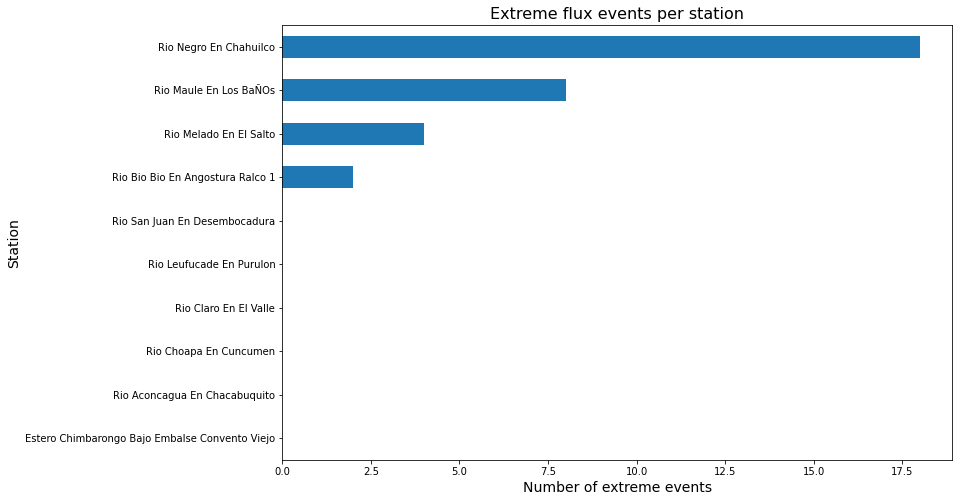

In [84]:
fig, ax = plt.subplots(figsize = (12,8))
last5_filtered.groupby('gauge_name').flux_extreme.sum().sort_values(ascending = True).plot(kind='barh')
ax.set_title('Extreme flux events per station', fontsize = 16)
ax.set_xlabel('Number of extreme events', fontsize = 14)
ax.set_ylabel('Station', fontsize = 14);

We observe that some stations present a higher number of extreme events. In particular, "Rio Negro En Chahuilco" stands out for the high number of events compared to the other stations that present extreme events.

It's worth noticing that only a 4 out of the 10 selected stations presented extreme events. 

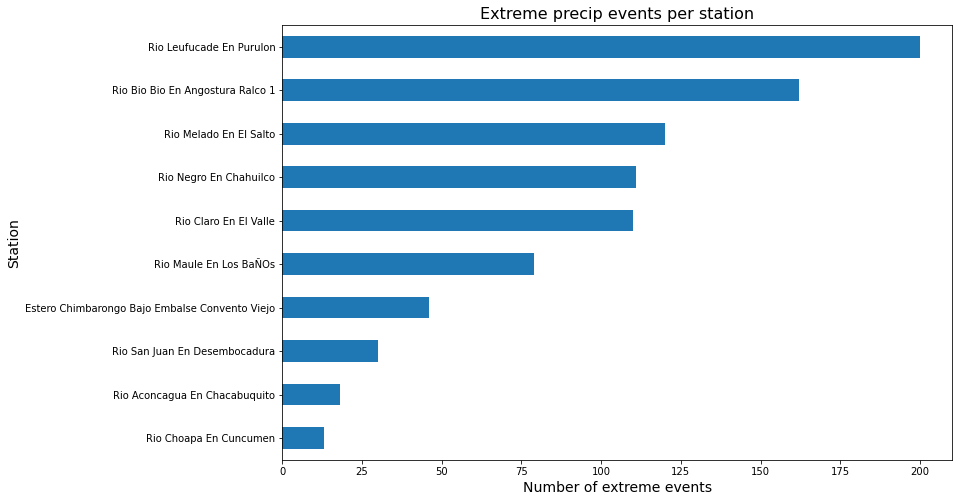

In [86]:
fig, ax = plt.subplots(figsize = (12,8))
last5_filtered.groupby('gauge_name').precip_extreme.sum().sort_values(ascending = True).plot(kind='barh')
ax.set_title('Extreme precip events per station', fontsize = 16)
ax.set_xlabel('Number of extreme events', fontsize = 14)
ax.set_ylabel('Station', fontsize = 14);

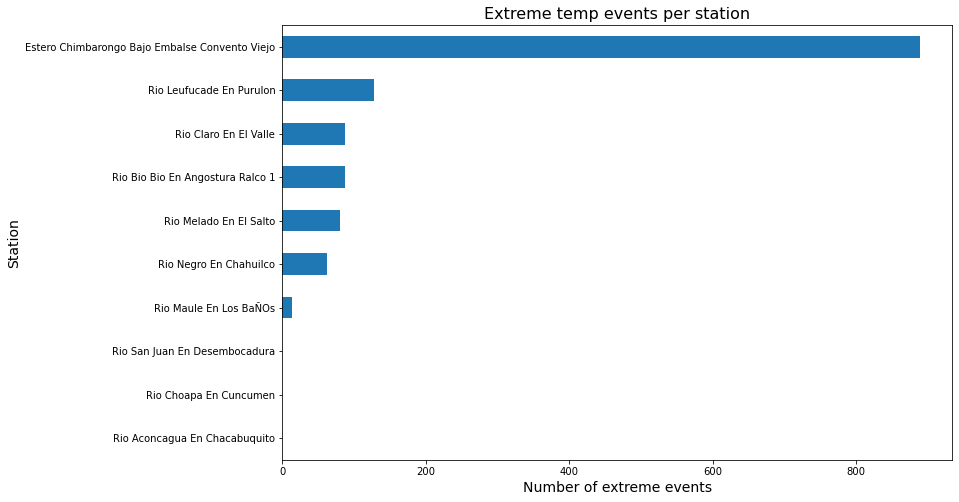

In [85]:
fig, ax = plt.subplots(figsize = (12,8))
last5_filtered.groupby('gauge_name').temp_extreme.sum().sort_values(ascending = True).plot(kind='barh')
ax.set_title('Extreme temp events per station', fontsize = 16)
ax.set_xlabel('Number of extreme events', fontsize = 14)
ax.set_ylabel('Station', fontsize = 14);

In [79]:
last5_filtered[['gauge_name','lat','lon']].drop_duplicates()

,gauge_name,lat,lon
0,Rio Choapa En Cuncumen,-31.9667,-70.5944
1946,Rio Aconcagua En Chacabuquito,-32.8503,-70.5094
3892,Rio Claro En El Valle,-34.6867,-70.8739
5838,Estero Chimbarongo Bajo Embalse Convento Viejo,-34.7647,-71.1372
7784,Rio Maule En Los BaÑOs,-35.8197,-70.7606
9730,Rio Melado En El Salto,-35.8842,-71.0192
11676,Rio Bio Bio En Angostura Ralco 1,-38.0369,-71.4781
13620,Rio Leufucade En Purulon,-39.4781,-72.6908
15566,Rio Negro En Chahuilco,-40.7136,-73.2278
17512,Rio San Juan En Desembocadura,-53.6500,-70.9667


6. Plot the percentage of extreme events during time. Have they become more frequent?


Extreme flux events become more frecuent between 2017 and 2019. The data here is not representative as we had to reduce the number of stations to 10, and the extreme flux events observed all belong to 4 of the 10 stations selected for this quick analysis.

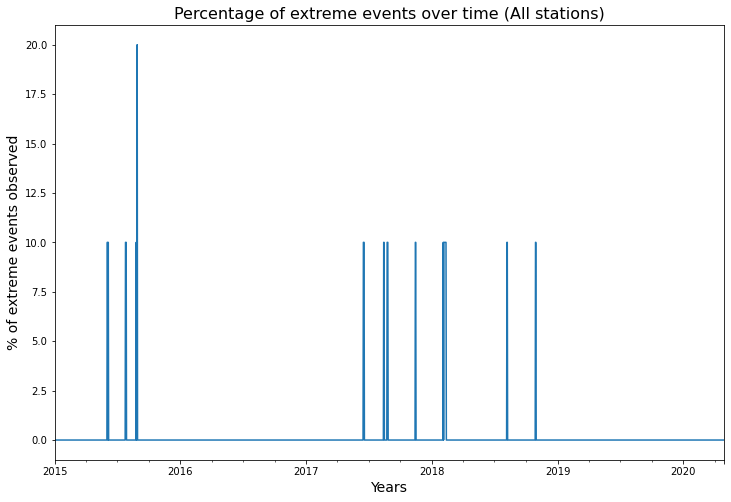

In [76]:
df_event_over_time = last5_filtered.groupby('date').flux_extreme.agg([np.sum, 'count'])
df_event_over_time['percent'] =  [round(df_event_over_time['sum'].iloc[i]*100/df_event_over_time['count'].iloc[i],2) for i in range(len(df_event_over_time['sum']))]

fig, ax = plt.subplots(figsize = (12,8))
df_event_over_time['percent'].plot()

ax.set_title('Percentage of extreme events over time (All stations)', fontsize = 16)
ax.set_xlabel('Years', fontsize = 14)
ax.set_ylabel('% of extreme events observed', fontsize = 14);

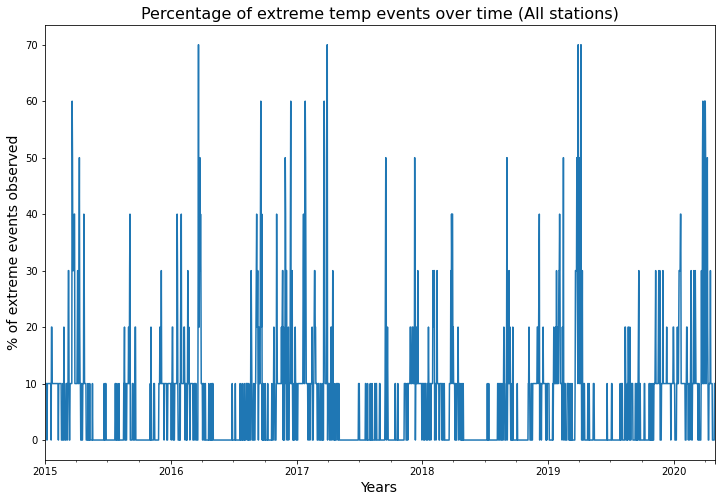

In [87]:
df_event_over_time = last5_filtered.groupby('date').temp_extreme.agg([np.sum, 'count'])
df_event_over_time['percent'] =  [round(df_event_over_time['sum'].iloc[i]*100/df_event_over_time['count'].iloc[i],2) for i in range(len(df_event_over_time['sum']))]

fig, ax = plt.subplots(figsize = (12,8))
df_event_over_time['percent'].plot()

ax.set_title('Percentage of extreme temp events over time (All stations)', fontsize = 16)
ax.set_xlabel('Years', fontsize = 14)
ax.set_ylabel('% of extreme events observed', fontsize = 14);

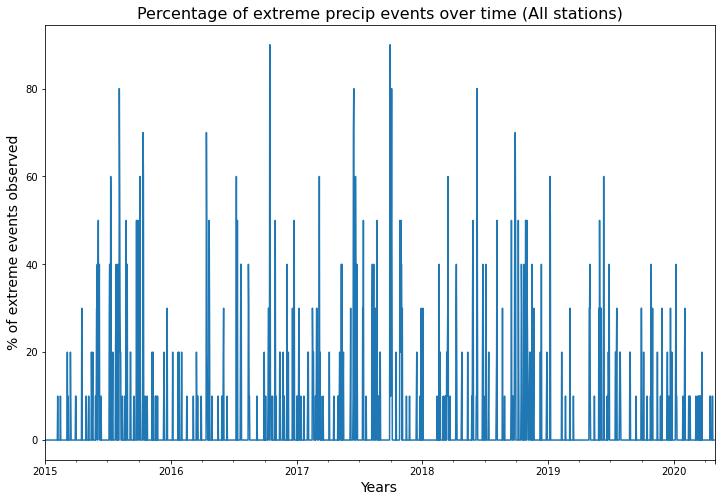

In [90]:
df_event_over_time = last5_filtered.groupby('date').precip_extreme.agg([np.sum, 'count'])
df_event_over_time['percent'] =  [round(df_event_over_time['sum'].iloc[i]*100/df_event_over_time['count'].iloc[i],2) for i in range(len(df_event_over_time['sum']))]

fig, ax = plt.subplots(figsize = (12,8))
df_event_over_time['percent'].plot()

ax.set_title('Percentage of extreme precip events over time (All stations)', fontsize = 16)
ax.set_xlabel('Years', fontsize = 14)
ax.set_ylabel('% of extreme events observed', fontsize = 14);

### Extreme Flux Predictions

7. Extreme flux prediction. Train one or many models (using your preferred algorithms) for estimating the probability of having an extreme flux. Feel free to create new features or use external variables. Some of the discussion we would like to see: Which data can be used and which cannot? Of course, we cannot use future data, but what about data from the same day? Or from the previous day?  
    
    Everything depends on how you propose the model use. Make a proposal on how you would use the model in practice (for example, once trained, the model will predict next day probability). Depending on your proposal, set constraints about which variables you can or cannot use.


#### Implementation

This first model is an over-simplification of the problem. The same implementation should be done for each station, as each model reflects only predictions for an specific station. The model returns a binary variable indicating that the day presents an extreme flux, or not. The modeling is done using a SARIMA type model, with only default settings. 

In [152]:
last5_filtered.set_index('date', inplace = True)

In [178]:
last5_filtered = last5_filtered.sort_index()

In [179]:
# Get the values for a particular station.

data = last5_filtered[last5_filtered.gauge_name == 'Rio Negro En Chahuilco']['flux_extreme']

In [180]:
test_size = 365

# We'll split the data leaving the first 4 years as the training set and the last year as the test set.
df_train = data[:-test_size]
df_test = data[-test_size:]

In [210]:
# SARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX
# fit model
model = SARIMAX(df_train)
model_fit = model.fit(disp=False)
# make prediction
y_pred_train = model_fit.predict(1, len(df_train))
y_pred_test = model_fit.predict(1, len(df_test))

/Users/eduardorossel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/eduardorossel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/eduardorossel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [211]:
# Putting together a df with the train results
results = pd.concat([pd.DataFrame(df_train).reset_index(drop=True),
           pd.DataFrame(y_pred_train).reset_index(drop=True)], axis=1, ignore_index = True)
results.columns = ['True','Pred']
results['Pred_bin'] = [1 if results.Pred.iloc[i] >= 0.5 else 0 for i in range(len(results.Pred))]
results

In [214]:
results.shape

(1581, 3)

In [215]:
# Putting together a df with the test results
results_test = pd.concat([pd.DataFrame(df_test).reset_index(drop=True),
           pd.DataFrame(y_pred_test).reset_index(drop=True)], axis=1, ignore_index = True)

results_test.columns = ['True','Pred']
results_test['Pred_Test_bin'] = [1 if results_test.Pred.iloc[i] >= 0.5 else 0 for i in range(len(results_test.Pred))]
results_test.shape

(365, 3)

In [218]:
from sklearn.metrics import classification_report
print('Reports for Train results:')
print(classification_report(results['True'], results['Pred_bin']))

Reports for Train results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1563
           1       1.00      1.00      1.00        18

    accuracy                           1.00      1581
   macro avg       1.00      1.00      1.00      1581
weighted avg       1.00      1.00      1.00      1581



In [219]:
print('Reports for Test results:')
print(classification_report(results_test['True'], results_test['Pred_Test_bin']));

Reports for Test results:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       365
           1       0.00      0.00      0.00         0

    accuracy                           0.98       365
   macro avg       0.50      0.49      0.49       365
weighted avg       1.00      0.98      0.99       365



/Users/eduardorossel/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eduardorossel/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eduardorossel/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


This model is simple and it doesn't take into consideration the measuments on flux, temp and precipitation we could include those variables as exogenous, using exog parameter.
Also the data is extremely imbalanced and that's the main reason that it fails identifying extreme fluxes in the test set, as we observe from the classification reports.

8. Analyze the model results.
    - a) What is the performance of the model? Which metrics you consider are the best suited for this problem? What are the most important variables? What do you think about the results?
    - b) If we wanted to identify at least 70% of the extreme flux events, which are the metrics of your model for that threshold? It is a useful model?
    
**a.** The model performs poorly as observed in the classification report for the test. The precision and recall for the extreme events in the test set are 0, one cause being that the set is highly unbalanced and the model simple.
**b.** With the original goal in mind, the model it's not useful as you can't directly define a threshold parameter that allows to move the decision boundary.

9. Upload your work to a public repository (MIT licence desired) and send the link to us:
    - **To**: mariapaz.salvatierra@bain.com 
    - **Cc**: aline.andrade@bain.com
    - **Subject**: “Watershed Challenge”
